## Sentiment Analysis Using Recurrent Neural Networks (RNN) with IMDB Dataset

### 1. Understanding Sentiment Analysis and RNNs

-   Sentiment Analysis and its Applications: 

Sentiment analysis involves determining the emotional tone or opinion expressed in a piece of content, such as identifying whether a product review is positive, negative, or neutral. This technique is widely used in customer service, where businesses analyze reviews to measure customer satisfaction. It’s also crucial for social media monitoring, where brands track real-time public sentiment to understand how their audience feels about their products or services, allowing them to respond quickly to any emerging trends or issues.

-  How RNNs differ from traditional feedforward neural networks: 

Recurrent Neural Networks (RNNs) are a type of neural network designed for processing sequences of data. Unlike traditional feedforward neural networks, where the input data flows in one direction (from input to output), RNNs have connections that loop back on themselves. This looping allows RNNs to maintain a memory of previous inputs in the sequence, making them well-suited for tasks like sentiment analysis, where the context provided by previous words in a sentence is crucial. 

In traditional feedforward neural networks, each input is processed independently, with no consideration of past inputs. In contrast, RNNs consider the sequence of inputs and can capture dependencies between them.

-   The concept of hidden states and how information is passed through time steps in RNNs:
 
In RNNs, hidden states are a key concept. A hidden state is a representation of the information learned from previous time steps in the sequence. As the RNN processes each input in the sequence, it updates its hidden state based on the new input and the previous hidden state.

This process allows the RNN to "remember" information from earlier in the sequence and use it to make better predictions for later inputs. The hidden state at each time step is passed on to the next time step, enabling the network to capture patterns over time.

- Common Issues with RNNs: Vanishing and Exploding Gradients:

One of the main challenges with training RNNs is the problem of vanishing and exploding gradients. These issues occur during the process of backpropagation, where the network's weights are updated based on the error or loss.

Vanishing gradients happen when the gradients (which are used to update the weights) become very small as they are propagated backward through time. This can cause the network to learn very slowly or even stop learning altogether, particularly for long sequences.

Exploding gradients occur when the gradients become very large, leading to unstable updates and causing the network's parameters to grow uncontrollably.

These issues can make it difficult to train RNNs effectively, particularly for tasks involving long sequences. Techniques like gradient clipping (to prevent exploding gradients) and Long Short-Term Memory (LSTM) networks (a type of RNN designed to combat vanishing gradients) are often used to address these problems.

-  Additional Concepts to Know: 


In addition to the basic ideas of sentiment analysis and Recurrent Neural Networks (RNNs), there are several other concepts that can deepen our understanding:

1. Bidirectional RNNs
A Bidirectional RNN is an extension of the traditional RNN that processes the input sequence in both forward and backward directions. This allows the network to have context from both the past and the future, making it more effective for tasks where understanding the full context of the sequence is important, such as sentiment analysis.

2. Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRUs)
LSTMs and GRUs are special types of RNNs designed to address the vanishing gradient problem. They introduce gates that control the flow of information, allowing the network to maintain long-term dependencies and learn better from sequences. LSTMs have three gates (input, output, and forget), while GRUs have two (update and reset), making GRUs slightly simpler and faster to train.

3. Attention Mechanisms
Attention mechanisms allow RNNs to focus on specific parts of the input sequence when making predictions. This is particularly useful in tasks like translation, where certain words in the input may have more importance than others in determining the output. 

4. Transfer Learning in NLP
Transfer learning involves pre-training a model on a large dataset and then fine-tuning it on a smaller, task-specific dataset. In NLP, models like BERT (Bidirectional Encoder Representations from Transformers) and GPT (Generative Pre-trained Transformer) are pre-trained on massive text corpora and can be fine-tuned for tasks like sentiment analysis, achieving state-of-the-art results.

5. Word Embeddings
Word embeddings are dense vector representations of words that capture their meanings based on context. Models like Word2Vec, GloVe, and FastText are used to create these embeddings, which can then be input into RNNs or other models to improve their performance on tasks like sentiment analysis.

References:
- Cambria, E. (2016). Affective Computing and Sentiment Analysis. IEEE Intelligent Systems, 31(2), 102-107.
- Liu, B. (2012). Sentiment Analysis and Opinion Mining. Synthesis Lectures on Human Language Technologies, 5(1), 1-167.
- Hochreiter, S., & Schmidhuber, J. (1997). Long Short-Term Memory. Neural Computation, 9(8), 1735-1780.
- Graves, A. (2012). Supervised Sequence Labelling with Recurrent Neural Networks. Studies in Computational Intelligence, Vol 385. Springer.
- Pascanu, R., Mikolov, T., & Bengio, Y. (2013). On the difficulty of training Recurrent Neural Networks. In Proceedings of the 30th International Conference on Machine Learning (pp. 1310-1318).
Bahdanau, D., Cho, K., & Bengio, Y. (2015). Neural Machine Translation by Jointly Learning to Align and Translate. In Proceedings of the 3rd International Conference on Learning Representations (ICLR).
- Sutskever, I., Vinyals, O., & Le, Q. V. (2014). Sequence to Sequence Learning with Neural Networks. In Advances in Neural Information Processing Systems (pp. 3104-3112).

### 2. Dataset Preparation

In [56]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [32]:
# Load the IMDB dataset
# I ma using the top 10,000 words in the dataset for faster processing
max_features = 10000
max_len = 200

# Loading the IMDB dataset with only the top 10,000 most common words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [33]:
# Padding sequences to ensure that all inputs have the same length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

### 3. Building the RNN Model

In [34]:
# Initialize the Sequential model
model = Sequential()

# Add an Embedding layer to convert word indices to dense vectors of fixed size
model.add(Embedding(input_dim=max_features, output_dim=128))

# Add an LSTM layer with 128 units
model.add(LSTM(128, return_sequences=False))

# Adding a Dropout layer to reduce overfitting
model.add(Dropout(0.5))

# Add a Dense layer with 1 unit and a sigmoid activation function
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# Using binary_crossentropy as the loss function because this is a binary classification problem
# The optimizer 'adam' is chosen for its good performance in training deep learning models
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### 4. Training the Model

In [35]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [36]:
# Training the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=10, batch_size=512, 
                    validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.5986 - loss: 0.6757 - val_accuracy: 0.7260 - val_loss: 0.5794
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 40s 995ms/step - accuracy: 0.7898 - loss: 0.4727 - val_accuracy: 0.8400 - val_loss: 0.3733
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 911ms/step - accuracy: 0.8826 - loss: 0.3005 - val_accuracy: 0.8222 - val_loss: 0.4230
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 846ms/step - accuracy: 0.9045 - loss: 0.2450 - val_accuracy: 0.8688 - val_loss: 0.3276
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 822ms/step - accuracy: 0.9401 - loss: 0.1678 - val_accuracy: 0.8672 - val_loss: 0.3694
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 830ms/step - accuracy: 0.9563 - loss: 0.1338 - val_accuracy: 0.8614 - val_loss: 0.4137
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 846ms/step - accuracy: 0.9628 - loss: 0.1125 - val_accuracy: 0.8656 - val_loss: 0.3918


**Observations:**
-  The model quickly improves, with training accuracy increasing from 59.86% in Epoch 1 to 96.28% by Epoch 7.
-  Validation accuracy peaks at 86.88% in Epoch 4, while training accuracy continues to rise, indicating potential overfitting.
-  Validation loss decreases initially but then increases from 0.3276 in Epoch 4 to 0.4137 by Epoch 6 and 0.3918 by Epoch 7, suggesting overfitting might be occurring.

Let's see in the next step how the model performs on the test data..

### 5. Evaluating the Model

782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8625 - loss: 0.3383
Test Accuracy: 0.8621


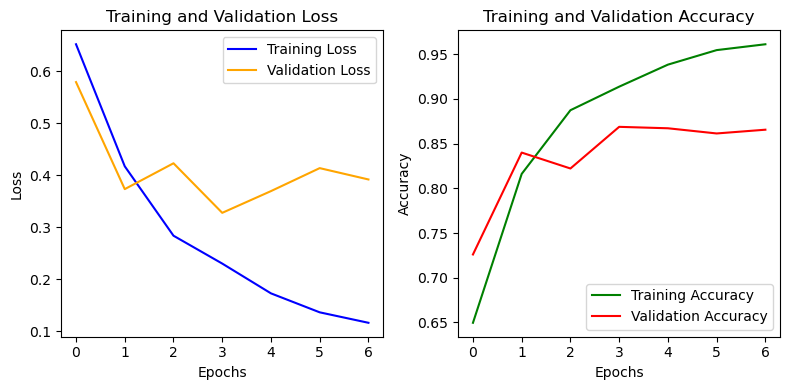

In [37]:
# Evaluating the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Create a figure with two subplots: one for loss and one for accuracy
fig, ax1 = plt.subplots(1, 2, figsize=(8, 4))

# Plotting the training and validation loss on the first subplot
ax1[0].plot(history.history['loss'], label='Training Loss', color='blue')
ax1[0].plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax1[0].set_title('Training and Validation Loss')
ax1[0].set_xlabel('Epochs')
ax1[0].set_ylabel('Loss')
ax1[0].legend()

# Plotting the training and validation accuracy on the second subplot
ax1[1].plot(history.history['accuracy'], label='Training Accuracy', color='green')
ax1[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax1[1].set_title('Training and Validation Accuracy')
ax1[1].set_xlabel('Epochs')
ax1[1].set_ylabel('Accuracy')
ax1[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the combined plot
plt.show()

In [38]:
##DELETE THIS AT THE END##
import pandas as pd
# Assuming 'history' is the result from model.fit() and contains the training history
history_dict = history.history

# Create a DataFrame from the history dictionary
df_history = pd.DataFrame(history_dict)

# Adding the test accuracy and test loss to the DataFrame
df_history['test_loss'] = [test_loss] * len(df_history)
df_history['test_accuracy'] = [test_acc] * len(df_history)

# Display the DataFrame
print(df_history)

   accuracy      loss  val_accuracy  val_loss  test_loss  test_accuracy
0   0.64955  0.652208        0.7260  0.579356   0.340221        0.86212
1   0.81615  0.417191        0.8400  0.373262   0.340221        0.86212
2   0.88740  0.283537        0.8222  0.423028   0.340221        0.86212
3   0.91375  0.229886        0.8688  0.327591   0.340221        0.86212
4   0.93840  0.172520        0.8672  0.369441   0.340221        0.86212
5   0.95465  0.136000        0.8614  0.413676   0.340221        0.86212
6   0.96120  0.115847        0.8656  0.391845   0.340221        0.86212


**Observations:**

-  The test accuracy remains consistent across last 4 epochs, indicating that the model performs reliably on unseen data.
-  Test loss is stable, suggesting that the model has generalized well and is not overfitting despite fluctuations in validation loss during training.
-  The final test accuracy aligns closely with the highest validation accuracy, further supporting the model’s robustness on new data.

### 6. Hyperparameter Tuning

Before tuning the hyperparameters, let's take a look at the model.summary() output to understand the current structure and parameters of the first model.

In [40]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,235,141 (16.16 MB)

 Trainable params: 1,411,713 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,823,428 (10.77 MB)

Next, I am going to try tuning the hyperparameters to further optimize its performance.

In [44]:

from tensorflow.keras.optimizers import Adam

# Model with LSTM layers
model_2 = tf.keras.Sequential()

# Adding an LSTM layer with 128 units, and return_sequences=True to stack another LSTM layer
model_2.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_2.add(Dropout(0.2))  # Adding Dropout to prevent overfitting

# Adding another LSTM layer with 64 units
model_2.add(LSTM(64))
model_2.add(Dropout(0.2))  # Dropout layer again to prevent overfitting

# Output layer with a single neuron (binary classification)
model_2.add(Dense(1, activation='sigmoid'))

# Compile the model with the Adam optimizer and a lower learning rate for better convergence
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting and restore the best weights based on validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model
history = model_2.fit(x_train, y_train, epochs=10, batch_size=512, 
                      validation_data=(x_val, y_val), callbacks=[early_stopping])


c:\Users\adria\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5011 - loss: 0.6990 - val_accuracy: 0.5342 - val_loss: 0.6883
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5303 - loss: 0.6911 - val_accuracy: 0.5534 - val_loss: 0.6846
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.5338 - loss: 0.6899 - val_accuracy: 0.5588 - val_loss: 0.6813
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.5481 - loss: 0.6888 - val_accuracy: 0.5544 - val_loss: 0.6833
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.5675 - loss: 0.6822 - val_accuracy: 0.5648 - val_loss: 0.6806
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5472 - loss: 0.6866 - val_accuracy: 0.5640 - val_loss: 0.6799
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5704 - loss: 0.6801 - val_accuracy: 0.5644 - val_loss: 0.6795
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.5616 - loss: 0.6831 - val_accuracy: 0.5610 - val_loss:

**Observations:**
-  Initial accuracy is low at 50.11% in Epoch 1.
-  Slow improvement, reaching 57.24% validation accuracy by Epoch 10.
-  Gradual decrease in validation loss, indicating learning, but progress is slow.
-  Minor signs of overfitting starting around Epoch 6.
-  Overall, the model's performance is not satisfactory.

I will try a different approach because this model does not perform well.

In [45]:
#New aproacch of hyperparameter tunning to improve the model performance

# Define the improved model
model_3 = Sequential()

# Embedding layer to convert word indices into dense vectors
model_3.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))

# First LSTM layer with 128 units and return_sequences=True to allow stacking
model_3.add(LSTM(128, return_sequences=True))
model_3.add(Dropout(0.4))  # Increased dropout rate for stronger regularization

# Second LSTM layer with 64 units
model_3.add(LSTM(64))
model_3.add(Dropout(0.4))  # Dropout to further reduce overfitting

# Additional Dense layer to increase model complexity
model_3.add(Dense(32, activation='relu'))
model_3.add(Dropout(0.3))  # Dropout after dense layer to prevent overfitting

# Output layer with a single neuron (for binary classification)
model_3.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and binary cross-entropy loss
model_3.compile(optimizer=Adam(learning_rate=0.0005),loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to monitor validation loss and restore best weights
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model
history = model_3.fit(x_train, y_train,epochs=20,batch_size=64,validation_data=(x_val, y_val),callbacks=[early_stopping])

# Evaluate the model on the validation data
test_loss, test_acc = model_3.evaluate(x_val, y_val)
print(f'Test Accuracy with improved LSTM model: {test_acc}')

c:\Users\adria\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 137s 420ms/step - accuracy: 0.6550 - loss: 0.5901 - val_accuracy: 0.8660 - val_loss: 0.3088
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 324ms/step - accuracy: 0.9014 - loss: 0.2676 - val_accuracy: 0.8756 - val_loss: 0.2965
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 128s 410ms/step - accuracy: 0.9225 - loss: 0.2090 - val_accuracy: 0.8648 - val_loss: 0.3553
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 130s 415ms/step - accuracy: 0.9541 - loss: 0.1385 - val_accuracy: 0.8632 - val_loss: 0.4085
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 324ms/step - accuracy: 0.9655 - loss: 0.1097 - val_accuracy: 0.8632 - val_loss: 0.4191
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 392ms/step - accuracy: 0.9791 - loss: 0.0662 - val_accuracy: 0.8582 - val_loss: 0.4968
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.8724 - loss: 0.3001
Test Accuracy with improved LSTM model: 0.8755999803543091


**Observations:**

-  The model starts with a solid accuracy of 65.50% in Epoch 1, quickly improving the validation accuracy to 86.60%.
-  Significant improvement in accuracy, reaching 90.14% by Epoch 2, with a corresponding validation accuracy of 87.56%.
-  Final test accuracy of 87.24% suggests the model performs well on unseen data but still shows signs of overfitting as validation loss increases towards the later epochs.

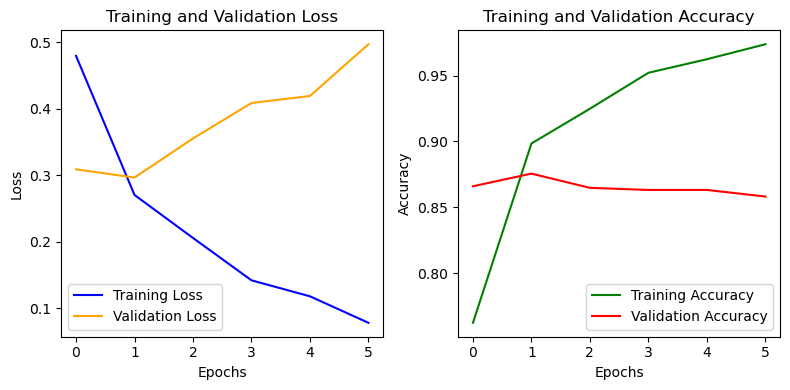

In [46]:

# Create a figure with two subplots: one for loss and one for accuracy
fig, ax1 = plt.subplots(1, 2, figsize=(8, 4))

# Plotting the training and validation loss on the first subplot
ax1[0].plot(history.history['loss'], label='Training Loss', color='blue')
ax1[0].plot(history.history['val_loss'], label='Validation Loss', color='orange')
ax1[0].set_title('Training and Validation Loss')
ax1[0].set_xlabel('Epochs')
ax1[0].set_ylabel('Loss')
ax1[0].legend()

# Plotting the training and validation accuracy on the second subplot
ax1[1].plot(history.history['accuracy'], label='Training Accuracy', color='green')
ax1[1].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax1[1].set_title('Training and Validation Accuracy')
ax1[1].set_xlabel('Epochs')
ax1[1].set_ylabel('Accuracy')
ax1[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the combined plot
plt.show()

In [47]:
model_3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 200, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 200, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,389,317 (16.74 MB)

 Trainable params: 1,463,105 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,926,212 (11.16 MB)

### 7. Comparative Analysis

I will build a straightforward feedforward neural network (FFN) and evaluate its performance against the RNN model.




In [49]:
from tensorflow.keras.layers import Flatten

# Define the feedforward neural network (FFN) model
simple_ffn = Sequential([
    # Embedding layer to convert word indices into dense vectors
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),

    # Flatten the 3D tensor to 2D for the dense layers
    Flatten(),

    # First Dense layer with 128 units
    Dense(128, activation='relu'),
    Dropout(0.3),  # Dropout layer to prevent overfitting

    # Second Dense layer with 64 units
    Dense(64, activation='relu'),
    Dropout(0.3),  # Dropout layer to prevent overfitting

    # Output layer with a single neuron (for binary classification)
    Dense(1, activation='sigmoid')
])

# Compile the FFN model with Adam optimizer and binary cross-entropy loss
simple_ffn.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy']
)

# Train the FFN model with early stopping
ffn_history = simple_ffn.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=32,  # Smaller batch size for more frequent updates
    validation_data=(x_val, y_val),
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]  # Early stopping to prevent overfitting
)

# Evaluate the FFN model on the validation data
ffn_test_loss, ffn_test_acc = simple_ffn.evaluate(x_val, y_val)
print(f'Test Accuracy with FFN: {ffn_test_acc}')

c:\Users\adria\anaconda3\envs\MachineLearning\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 115ms/step - accuracy: 0.6734 - loss: 0.5546 - val_accuracy: 0.8660 - val_loss: 0.3151
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.9634 - loss: 0.1086 - val_accuracy: 0.8346 - val_loss: 0.4569
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 99ms/step - accuracy: 0.9954 - loss: 0.0148 - val_accuracy: 0.8484 - val_loss: 0.7569
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 100ms/step - accuracy: 0.9966 - loss: 0.0111 - val_accuracy: 0.8406 - val_loss: 0.7088
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8545 - loss: 0.3206
Test Accuracy with FFN: 0.8659999966621399


**Observations:**
-  The model starts with strong initial accuracy, improving from 67.34% in Epoch 1 to 96.34% in Epoch 2.
-  Validation accuracy drops from 86.60% in Epoch 1 to 83.46% in Epoch 2, indicating early signs of overfitting.
-  Training accuracy nearly reaches 100%, but validation accuracy remains around 84-85% with increasing -  validation loss, showing clear overfitting.
-  Final test accuracy is 85.45%, decent but affected by overfitting during training.

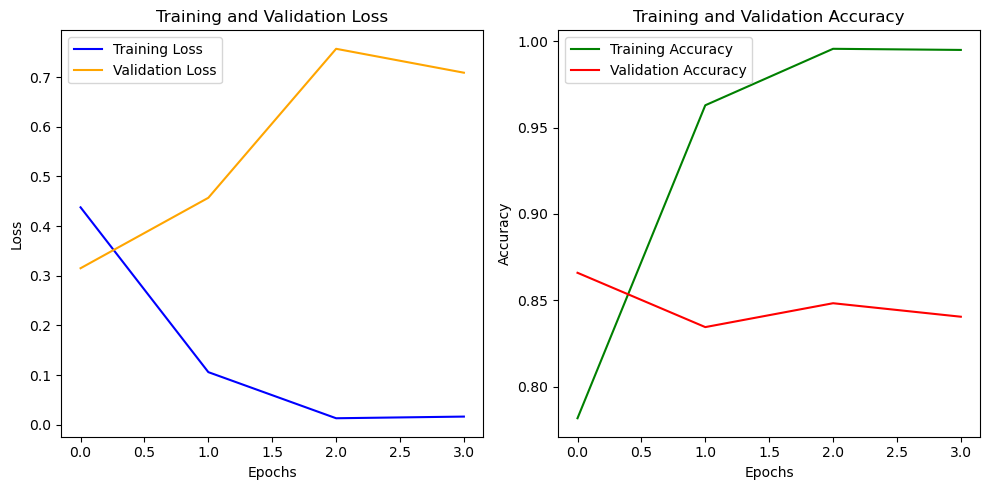

In [50]:
#Create a figure with two subplots: one for loss and one for accuracy
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the training and validation loss on the first subplot
ax[0].plot(ffn_history.history['loss'], label='Training Loss', color='blue')
ax[0].plot(ffn_history.history['val_loss'], label='Validation Loss', color='orange')
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plotting the training and validation accuracy on the second subplot
ax[1].plot(ffn_history.history['accuracy'], label='Training Accuracy', color='green')
ax[1].plot(ffn_history.history['val_accuracy'], label='Validation Accuracy', color='red')
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the combined plot
plt.show()

Lets compare the RNN and FFN performance

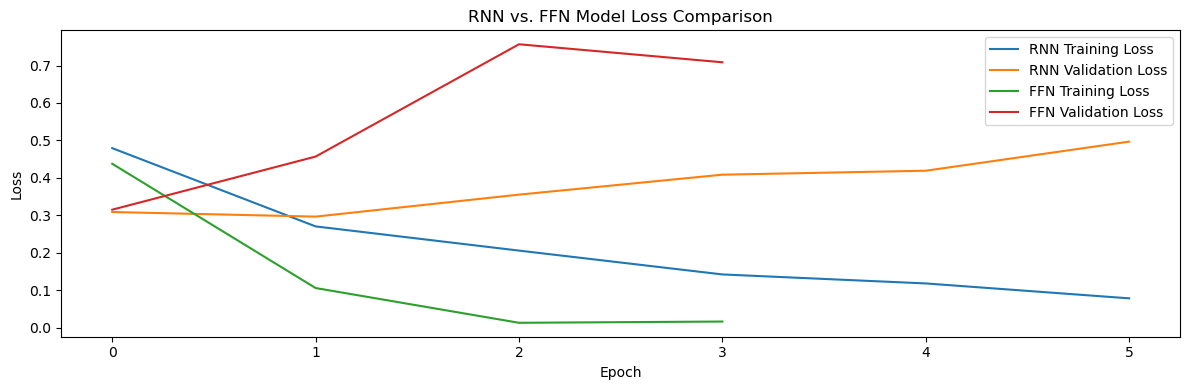

In [51]:
# Compare RNN and FFN performance
plt.figure(figsize=(12, 4))

# Plot RNN training and validation loss
plt.plot(history.history['loss'], label='RNN Training Loss')
plt.plot(history.history['val_loss'], label='RNN Validation Loss')

# Plot FFN training and validation loss
plt.plot(ffn_history.history['loss'], label='FFN Training Loss')
plt.plot(ffn_history.history['val_loss'], label='FFN Validation Loss')

# Add title and labels
plt.title('RNN vs. FFN Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

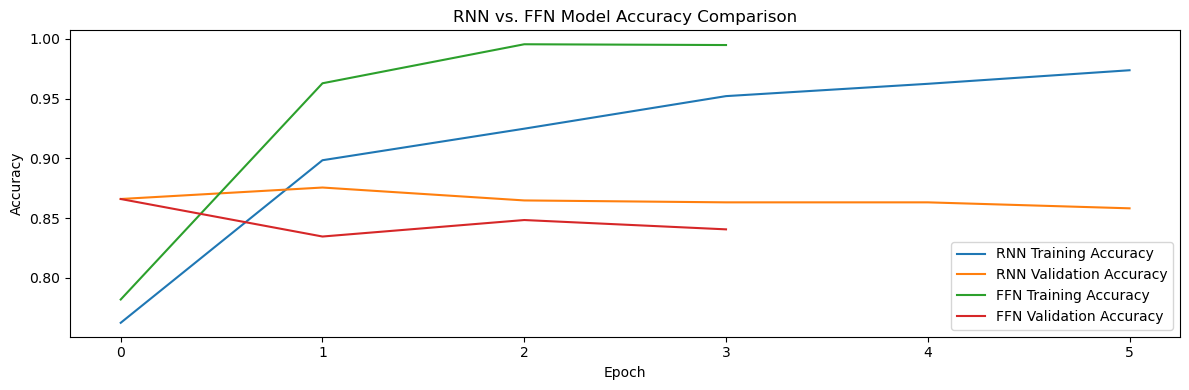

In [55]:
# Compare RNN and FFN performance
plt.figure(figsize=(12, 4))

# Plot RNN training and validation accuracy
plt.plot(history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='RNN Validation Accuracy')

# Plot FFN training and validation loss
plt.plot(ffn_history.history['accuracy'], label='FFN Training Accuracy')
plt.plot(ffn_history.history['val_accuracy'], label='FFN Validation Accuracy')

# Add title and labels
plt.title('RNN vs. FFN Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


**Comparative Analysis::**

- Both RNN and FFN models start with similar validation accuracy of 86.60% in the first epoch, though the FFN has a slightly lower training loss compared to the RNN.
- The FFN model quickly achieves very high training accuracy (99.55% by Epoch 3), indicating that it fits the training data extremely well. In contrast, the RNN model shows a more gradual increase in training accuracy, reaching 92.49% by Epoch 3.
-  The RNN maintains a relatively stable validation loss in the first two epochs, while the FFN shows a significant increase in validation loss starting from Epoch 2. By Epoch 3, the FFN's validation loss is much higher than the RNN's, indicating overfitting in the FFN model.
- Overall, the RNN model shows better generalization to unseen data, as indicated by its more consistent validation accuracy and lower validation loss compared to the FFN model, which suffers from overfitting despite high training accuracy.